In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
df=pd.read_csv("/content/sample_data/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


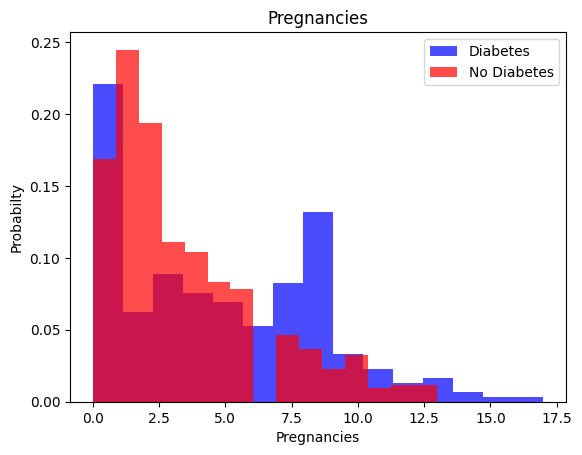

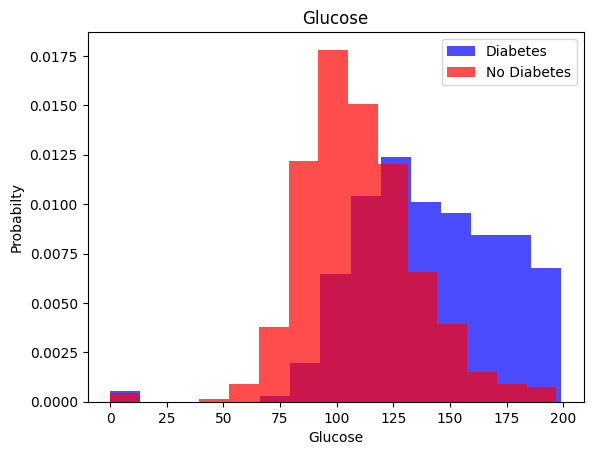

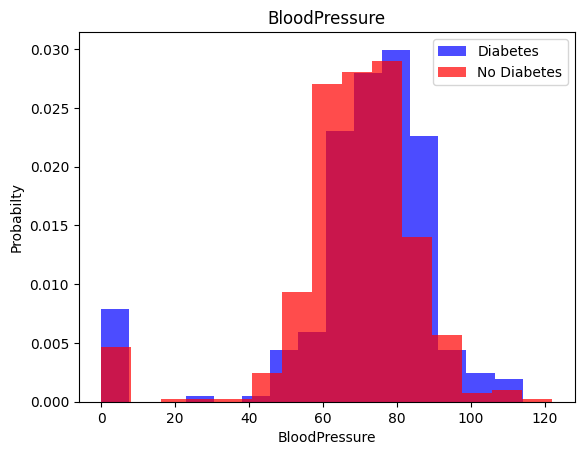

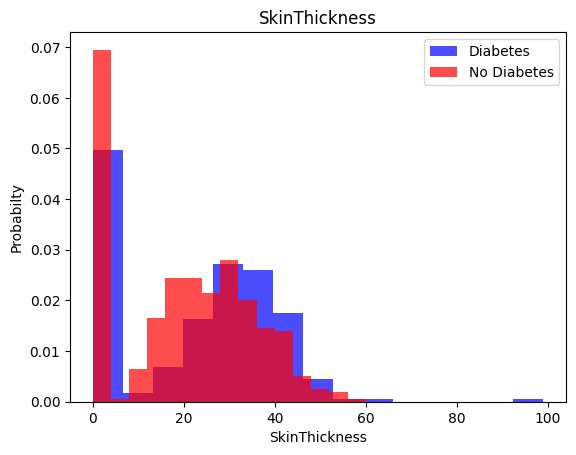

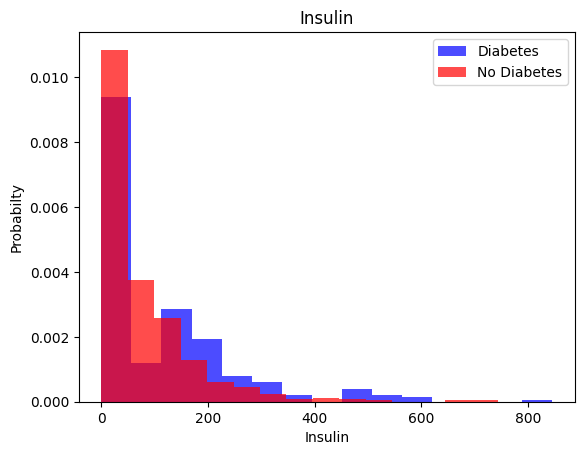

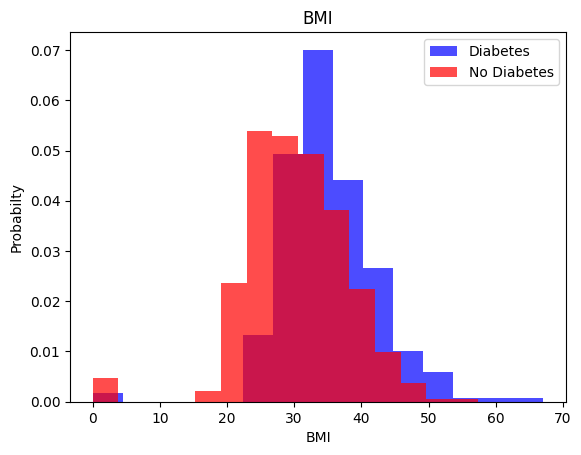

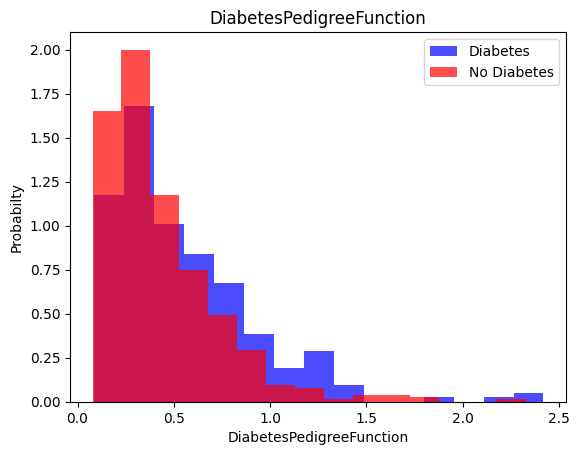

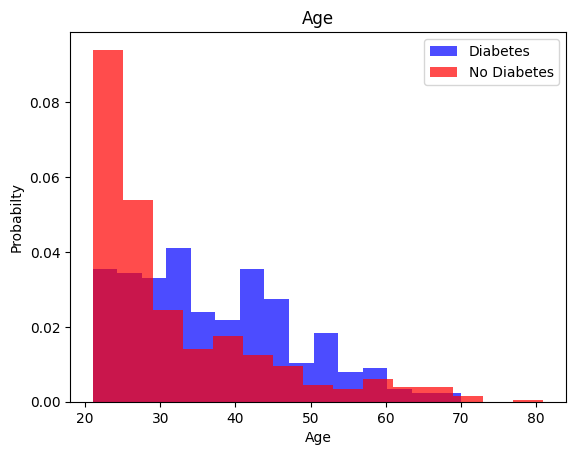

In [13]:
for i in range(len(df.columns[:-1])):
  label=df.columns[i]
  plt.hist(df[df["Outcome"]==1][label],color="blue",label="Diabetes",alpha=0.7,density=True,bins=15)
  plt.hist(df[df["Outcome"]==0][label],color="red",label="No Diabetes",alpha=0.7,density=True,bins=15)
  plt.title(label)
  plt.ylabel("Probabilty")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [14]:
X=df[df.columns[:-1]].values

In [15]:
y=df[df.columns[-1]].values

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [40]:
scaler=StandardScaler()
X=scaler.fit_transform(X)#Scaling

In [41]:
data=np.hstack((X,np.reshape(y,(-1,1))))
transformed_df=pd.DataFrame(data,columns=df.columns)

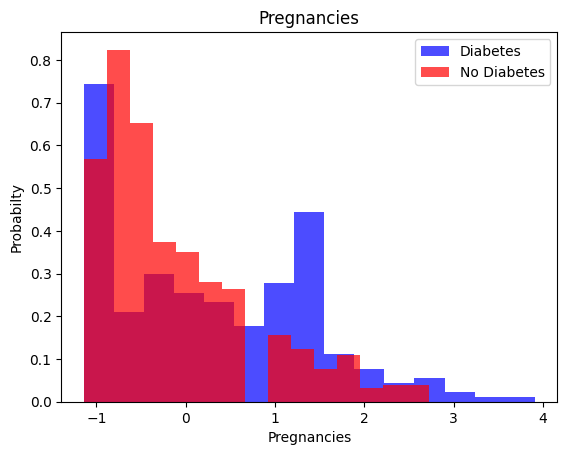

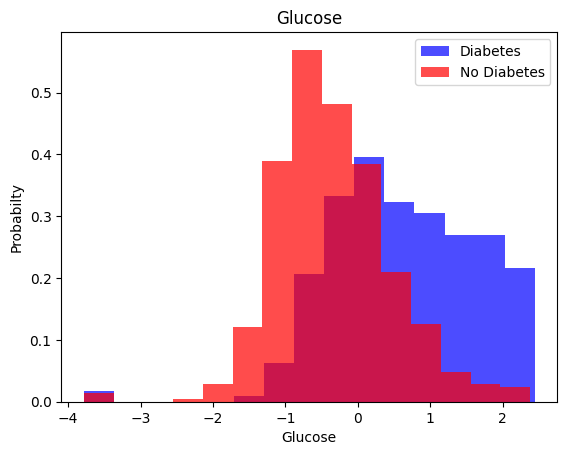

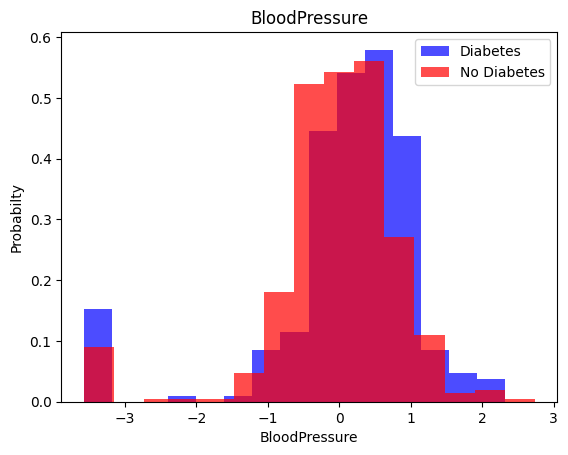

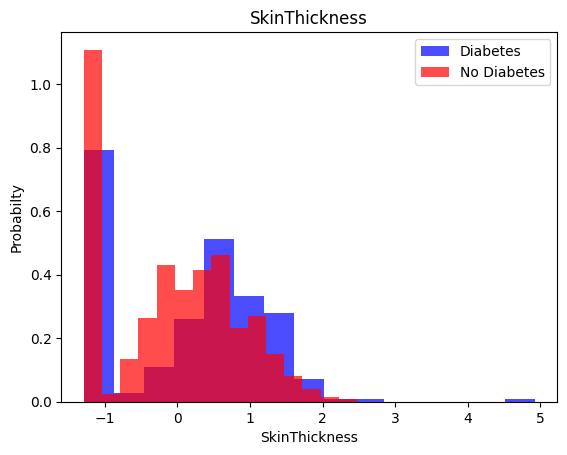

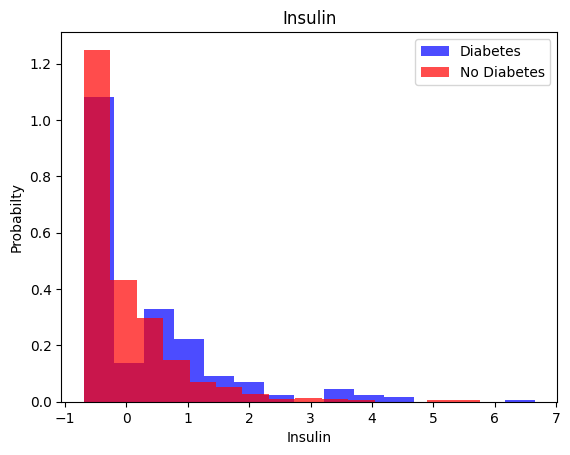

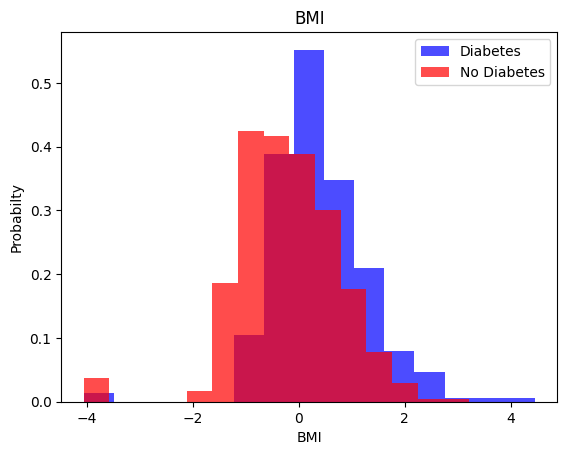

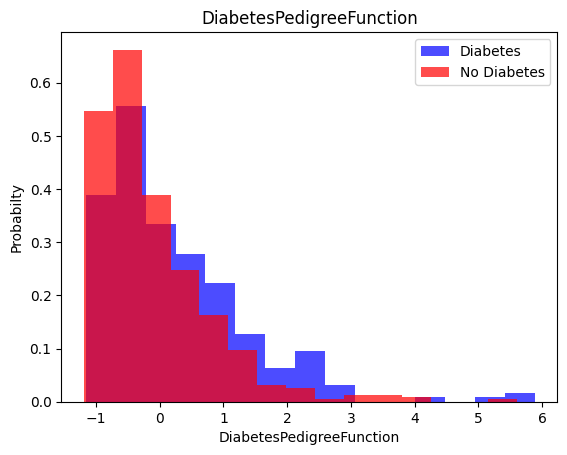

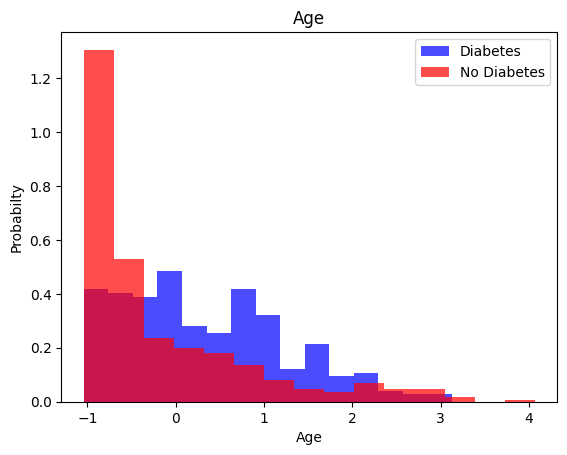

In [38]:
for i in range(len(df.columns[:-1])):
  label=df.columns[i]
  plt.hist(transformed_df[transformed_df["Outcome"]==1][label],color="blue",label="Diabetes",alpha=0.7,density=True,bins=15)
  plt.hist(transformed_df[transformed_df["Outcome"]==0][label],color="red",label="No Diabetes",alpha=0.7,density=True,bins=15)
  plt.title(label)
  plt.ylabel("Probabilty")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [43]:
over=RandomOverSampler()
X,y=over.fit_resample(X,y)

data=np.hstack((X,np.reshape(y,(-1,1))))
transformed_df=pd.DataFrame(data,columns=df.columns)

In [44]:
len(transformed_df[transformed_df["Outcome"]==1]),len(transformed_df[transformed_df["Outcome"]==0])

(500, 500)

In [45]:
X_train,X_temp,y_train,y_temp=train_test_split(X,y,test_size=0.4,random_state=0)
X_valid,X_test,y_valid,y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=0)

In [46]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation="relu"),
    tf.keras.layers.Dense(16,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [52]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy']
              )

In [53]:
model.evaluate(X_train,y_train)

19/19 [==============================] - 0s 1ms/step - loss: 0.4733 - accuracy: 0.7617


[0.47326919436454773, 0.7616666555404663]

In [54]:
model.evaluate(X_valid,y_valid)

7/7 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.7650


[0.4492701590061188, 0.7649999856948853]

In [55]:
model.fit(X_train,y_train,batch_size=16,epochs=20,validation_data=(X_valid,y_valid))

Epoch 1/20
38/38 [==============================] - 1s 3ms/step - loss: 0.4776 - accuracy: 0.7567 - val_loss: 0.4477 - val_accuracy: 0.7650
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 0.4738 - accuracy: 0.7617 - val_loss: 0.4481 - val_accuracy: 0.7650
Epoch 3/20
38/38 [==============================] - 0s 3ms/step - loss: 0.4710 - accuracy: 0.7617 - val_loss: 0.4445 - val_accuracy: 0.7600
Epoch 4/20
38/38 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.7583 - val_loss: 0.4438 - val_accuracy: 0.7600
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.4679 - accuracy: 0.7650 - val_loss: 0.4445 - val_accuracy: 0.7650
Epoch 6/20
38/38 [==============================] - 0s 5ms/step - loss: 0.4677 - accuracy: 0.7667 - val_loss: 0.4424 - val_accuracy: 0.7600
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.4653 - accuracy: 0.7683 - val_loss: 0.4449 - val_accuracy: 0.7600
Epoch 8/20
38/38 [==

In [56]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4466 - accuracy: 0.8250


[0.4465967118740082, 0.824999988079071]